# Salary Prediction using Custom Linear Regression

## Introduction
This project uses a custom implementation of Linear Regression to predict salaries based on years of experience.

## Workflow
1. Import necessary libraries and dataset.
2. Explore the dataset.
3. Split the data into training and testing sets.
4. Implement a custom `LinearRegression` class.
5. Train the model and calculate coefficients.
6. Make predictions and visualize the results.

## Dataset Information
- **Dataset Name**: `Salary_dataset.csv`
- **Features**:
  - `YearsExperience`: Number of years of experience.
  - `Salary`: Annual salary in dollars.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset
dataset = pd.read_csv(r"Data/Salary_dataset.csv")

# Display the first 5 rows
dataset.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
# Define features (X) and target (y)
X = dataset[["YearsExperience"]]  # Independent variable
y = dataset["Salary"]  # Dependent variable

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Custom implementation of a Linear Regression model
class LinearRegression:
    def __init__(self):
        """Initialize the model with placeholders for slope and intercept."""
        self.coef_ = None  # Slope (m)
        self.intercept_ = None  # Intercept (b)

    def fit(self, X, y):
        """
        Train the Linear Regression model using the training data.
        Arguments:
        - X: Independent variable (features), expects a DataFrame or Series.
        - y: Dependent variable (target), expects a Series.
        """
        Numerator = 0
        Denominator = 0
        
        # Ensure X and y are squeezed to 1D arrays for calculations
        X_values = X.squeeze()
        y_values = y.squeeze()
        
        # Calculate the slope (m) and intercept (b) using the least squares method
        for i in range(len(X_values)):
            Numerator += (X_values.iloc[i] - X_values.mean()) * (y_values.iloc[i] - y_values.mean())
            Denominator += (X_values.iloc[i] - X_values.mean()) ** 2
        
        # Store the slope and intercept
        self.coef_ = Numerator / Denominator
        self.intercept_ = y_values.mean() - (self.coef_ * X_values.mean())

    def predict(self, X):
        """
        Predict the target values for given input features.
        Arguments:
        - X: Input features, can be a list, NumPy array, or DataFrame.
        Returns:
        - Predicted values as a NumPy array.
        """
        # Convert input to a NumPy array if necessary
        if isinstance(X, list):
            X = np.array(X)
        if isinstance(X, pd.DataFrame):
            X = X.values
        
        # Calculate predictions
        y_pred = []
        for i in range(X.shape[0]):
            prediction = self.intercept_ + (self.coef_ * X[i])
            y_pred.append(prediction)
        
        return np.ravel(y_pred)

In [6]:
# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Retrieve the slope (m) and intercept (b)
m = lr.coef_  # Slope
b = lr.intercept_  # Intercept
print(f"Slope (m): {m}, Intercept (b): {b}")

Slope (m): 9423.815323030976, Intercept (b): 24380.201479473704


In [7]:
# Predict the salary for 9.7 years of experience
predicted_salary = lr.predict([[9.7]])
print(f"Predicted Salary for 9.7 years of experience: {predicted_salary[0]}")

Predicted Salary for 9.7 years of experience: 115791.21011287416


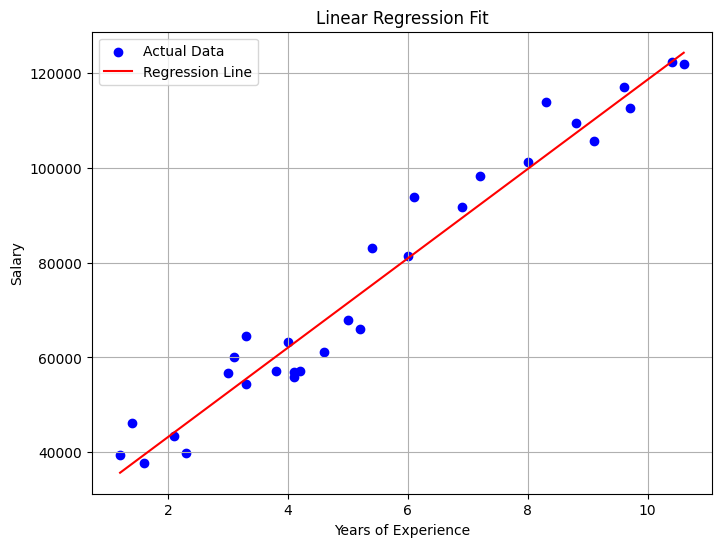

In [8]:
# Visualize the regression line
plt.figure(figsize=(8, 6))
plt.scatter(dataset["YearsExperience"], dataset["Salary"], label="Actual Data", color='blue')
plt.plot(dataset["YearsExperience"], lr.predict(X), color="red", label="Regression Line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression Fit")
plt.legend()
plt.grid()
plt.show()